In [5]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\looka\OneDrive\Documents\Python\RL\rl_model\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
import numpy as np
from collections import defaultdict ## allows access to keys which can not be accessed
import matplotlib.pyplot as plt
from matplotlib.patches import Patch # draw shaped
import seaborn as sns
from tqdm import tqdm # porgress bar
#%matpltolib inline -- no need in jupyter noteebook

In [29]:
import gymnasium as gym

In [11]:
## environment setting
env = gym.make('Blackjack-v1', sab=True, render_mode = "rgb_array")

In [17]:
## observing the environment
done = False
observation, info = env.reset()

# ovservation = (16, 9, True) my number, delear number, I do have Ace and its a tuple

In [18]:
# take steps - random action
action = env.action_space.sample()

## execute the action and receives the informations
observation, reward, terminated, truncated, info = env.step(action)

# sample output:
# observation=(24, 10, False)
# reward=-1.0
# terminated=True
# truncated=False
# info={}

C:\Users\looka\OneDrive\Documents\Python\RL\rl_model\lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [48]:
# Epsilon greedy strategy to solve blackjack
## create black jack agent class
class BJ:
    def __init__(self, learning_rate: float,initial_epsilon: float,epsilon_decay: float,final_epsilon: float,discount_factor: float = 0.95,):
        
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n)) # do not want to always check if the key exist
        self.lr = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon
        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_value[obs]))

    def update( self, obs: tuple[int, int, bool], action: int, reward: float, terminated: bool, next_obs: tuple[int, int, bool]):
        """update the q value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference  = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
           self.q_values[obs][action] + self.lr * temporal_difference 
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)
    

In [49]:
## settings value for hyperparameters
learning_rate = 0.01
n_episodes = 100_00
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_epsilon/2) ## reduce the exploration over time
final_epsilon = 0.1

agent = BJ(learning_rate, n_epsilon, start_epsilon, epsilon_decay, final_epsilon)

In [52]:
!pip install pygame

You should consider upgrading via the 'C:\Users\looka\OneDrive\Documents\Python\RL\rl_model\Scripts\python.exe -m pip install --upgrade pip' command.


  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

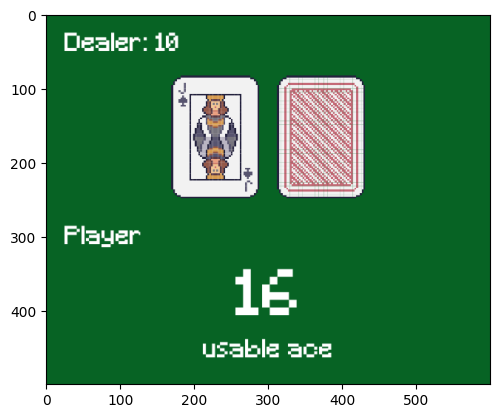

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]


ValueError: Attempted to add episode stats when they already exist

In [56]:
## training the agent
from IPython.display import clear_output
from collections import deque
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size = n_episodes)

## what is happening in every episode
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset() ## reset the environment in every episode
    done = False
    #clear_output() # e
    
    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        ## update the agent
        agent.update(obs, action, reward, terminated, next_obs)
        frame = env.render() # e
        plt.imshow(frame) # e
        plt.show() # e
        
        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs
        
    agent.decay_epsilon() ## over time it will get smarter